In [3]:
import pandas as pd
import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt

## get historical data 

In [ ]:
# no libraby worked so we got the data manully from : yahoo finance
# https://finance.yahoo.com

## Process the data

In [5]:
histo_data = pd.read_csv('TSLA.csv')
histo_data

,Date,Open,High,Low,Close,Adj Close,Volume,change,Class_target
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000,0.000000,0
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500,-4.204097,-1
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500,0.566422,1
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000,-0.156191,-1
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500,-0.156435,-1
...,...,...,...,...,...,...,...,...,...
1274,2020-01-27,36.132668,37.629333,35.952000,37.201332,37.201332,204121500,-1.203928,-1
1275,2020-01-28,37.899334,38.453999,37.205334,37.793331,37.793331,176827500,1.591338,1
1276,2020-01-29,38.379333,39.320000,37.828667,38.732666,38.732666,267022500,2.485452,1
1277,2020-01-30,42.161331,43.391998,41.200001,42.720669,42.720669,435085500,10.296226,1


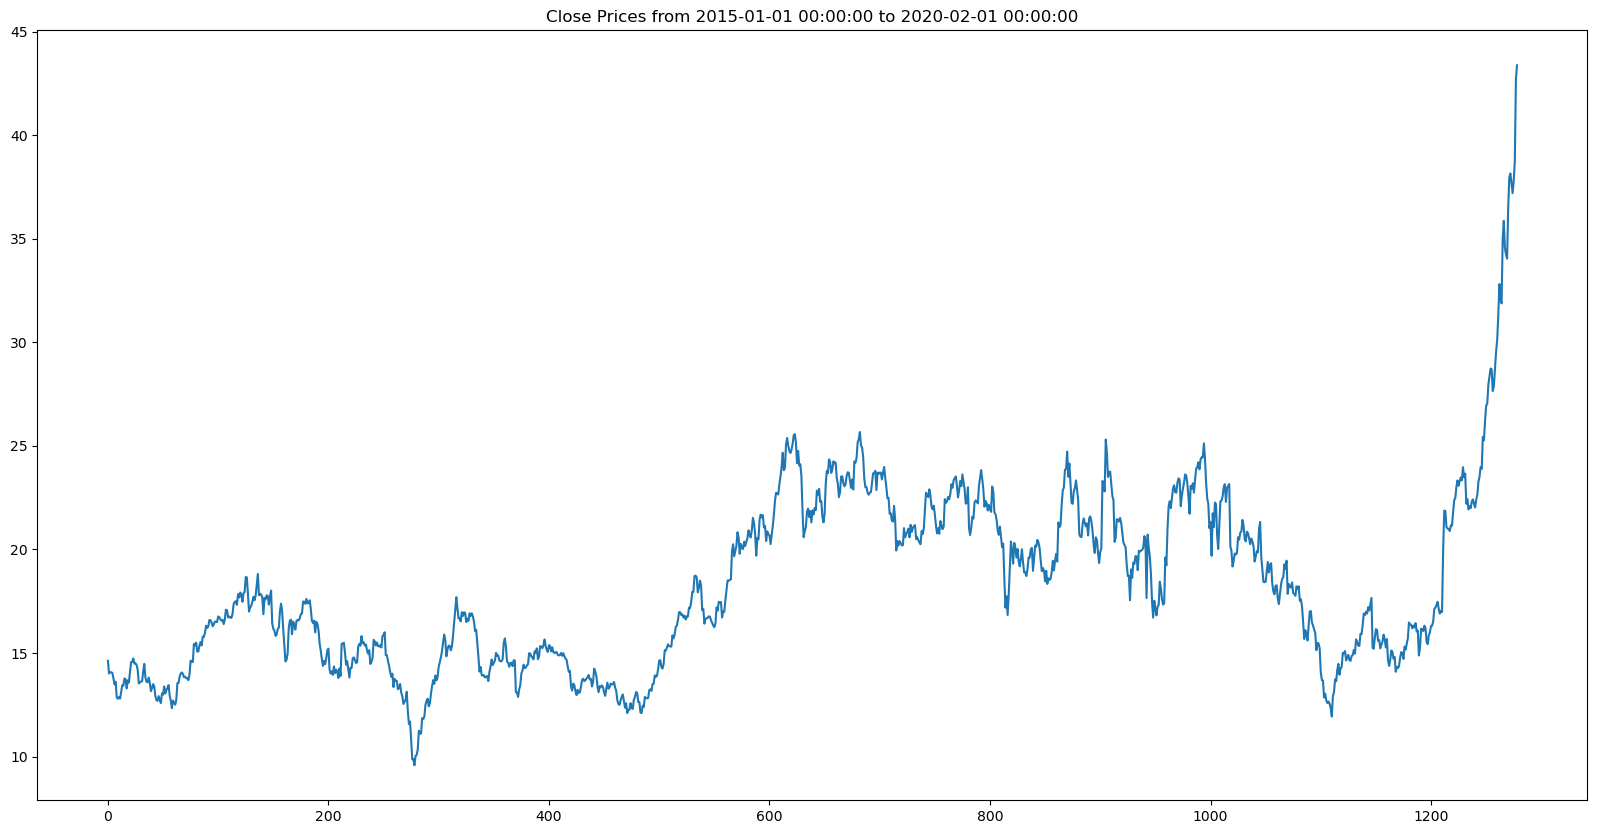

In [6]:
# display
# initialize parameters
start_date = datetime(2015, 1, 1)
end_date = datetime(2020, 2, 1)

plt.figure(figsize = (20,10))
plt.title('Close Prices from {} to {}'.format(start_date,end_date))
plt.plot(histo_data['Close'])
plt.show()

## calculate the change

In [7]:
len(histo_data)

1279

## Classify the change

In [8]:
Changes = []
Changes.append(0)
for i in range(1,len(histo_data)):
    
    p_old = histo_data['Close'][i-1]
    p_new = histo_data['Close'][i]
    
    change = ((p_new-p_old)/p_old)*100
    Changes.append(change)

In [10]:
newClass= []
for i in histo_data.index:
    #print(data.change[i])
    if((abs(histo_data.change[i]) < 0.01 )):
        print('no change --> 0')
        print('1% -->', histo_data.change[i])
        newClass.append(0)
        
    elif( histo_data.change[i] >= 0.01 ):
        print('ascending --> 1')
        print('1% -->', histo_data.change[i])
        newClass.append(1)
    elif( histo_data.change[i] <= -0.01 ):
        print('descending --> -1')
        print('1% -->', histo_data.change[i])
        newClass.append(-1)
    print('_______________________________')

no change --> 0
1% --> 0.0
_______________________________
descending --> -1
1% --> -4.204096844555718
_______________________________
ascending --> 1
1% --> 0.5664215336284456
_______________________________
descending --> -1
1% --> -0.15619084050054222
_______________________________
descending --> -1
1% --> -0.15643517791977365
_______________________________
descending --> -1
1% --> -1.8801633719533564
_______________________________
descending --> -1
1% --> -2.153290480820926
_______________________________
ascending --> 1
1% --> 1.0088521584280603
_______________________________
descending --> -1
1% --> -5.659733031585479
_______________________________
descending --> -1
1% --> -0.4255565934921395
_______________________________
ascending --> 1
1% --> 0.6254234801017226
_______________________________
descending --> -1
1% --> -0.590459434154959
_______________________________
ascending --> 1
1% --> 2.417553337611454
_______________________________
ascending --> 1
1% --> 2.5690542

In [11]:
histo_data['Class_target'] = newClass

In [9]:
histo_data['change'] = Changes

In [12]:
histo_data

,Date,Open,High,Low,Close,Adj Close,Volume,change,Class_target
0,2015-01-02,14.858000,14.883333,14.217333,14.620667,14.620667,71466000,0.000000,0
1,2015-01-05,14.303333,14.433333,13.810667,14.006000,14.006000,80527500,-4.204097,-1
2,2015-01-06,14.004000,14.280000,13.614000,14.085333,14.085333,93928500,0.566422,1
3,2015-01-07,14.223333,14.318667,13.985333,14.063333,14.063333,44526000,-0.156191,-1
4,2015-01-08,14.187333,14.253333,14.000667,14.041333,14.041333,51637500,-0.156435,-1
...,...,...,...,...,...,...,...,...,...
1274,2020-01-27,36.132668,37.629333,35.952000,37.201332,37.201332,204121500,-1.203928,-1
1275,2020-01-28,37.899334,38.453999,37.205334,37.793331,37.793331,176827500,1.591338,1
1276,2020-01-29,38.379333,39.320000,37.828667,38.732666,38.732666,267022500,2.485452,1
1277,2020-01-30,42.161331,43.391998,41.200001,42.720669,42.720669,435085500,10.296226,1


In [ ]:
histo_data.to_csv('TSLA.csv',index=False)

## add the close price, close and change to the social media aggregated data

In [24]:
agreg_data = pd.read_csv('3.tesla_twitter_data_aggregated.csv')
agreg_data

,date,tweet_id,post_date,comment_num,retweet_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,tweet_count,total_count_tweet
0,2015-01-01,5.175966e+19,133490951098,23,42,87,30.276263,12.192172,15,44,35,94,136
1,2015-01-02,1.113077e+20,286882492028,43,51,136,58.117857,24.628968,25,102,75,202,253
2,2015-01-03,4.962337e+19,127826282034,10,25,89,19.596165,6.015433,6,58,26,90,115
3,2015-01-04,6.620679e+19,170445126534,11,35,75,21.760570,7.227273,9,81,30,120,155
4,2015-01-05,1.523821e+20,392049185482,23,80,201,78.210868,36.700063,17,148,111,276,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,7.858624e+20,1023818090382,688,900,5253,235.425825,62.305687,112,227,310,649,1549
1823,2019-12-29,7.655246e+20,997058988274,673,839,6425,218.909844,42.348362,130,243,259,632,1471
1824,2019-12-30,1.645430e+21,2142539040171,1494,2201,13014,479.708670,111.280921,235,508,615,1358,3559
1825,2019-12-31,1.364695e+21,1776596925479,936,1086,9674,397.183524,100.569139,193,453,480,1126,2212


In [25]:
### merge price of the day to the data
histo_data.rename(columns = {'Date':'date'}, inplace = True)
merged = pd.merge(agreg_data, histo_data, how="left", on="date")
merged

,date,tweet_id,post_date,comment_num,retweet_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,...,tweet_count,total_count_tweet,Open,High,Low,Close,Adj Close,Volume,change,Class_target
0,2015-01-01,5.175966e+19,133490951098,23,42,87,30.276263,12.192172,15,44,...,94,136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-02,1.113077e+20,286882492028,43,51,136,58.117857,24.628968,25,102,...,202,253,14.858000,14.883333,14.217333,14.620667,14.620667,71466000.0,0.000000,0.0
2,2015-01-03,4.962337e+19,127826282034,10,25,89,19.596165,6.015433,6,58,...,90,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-04,6.620679e+19,170445126534,11,35,75,21.760570,7.227273,9,81,...,120,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05,1.523821e+20,392049185482,23,80,201,78.210868,36.700063,17,148,...,276,356,14.303333,14.433333,13.810667,14.006000,14.006000,80527500.0,-4.204097,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,7.858624e+20,1023818090382,688,900,5253,235.425825,62.305687,112,227,...,649,1549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,2019-12-29,7.655246e+20,997058988274,673,839,6425,218.909844,42.348362,130,243,...,632,1471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,2019-12-30,1.645430e+21,2142539040171,1494,2201,13014,479.708670,111.280921,235,508,...,1358,3559,28.586000,28.600000,27.284000,27.646667,27.646667,188796000.0,-3.643287,-1.0
1825,2019-12-31,1.364695e+21,1776596925479,936,1086,9674,397.183524,100.569139,193,453,...,1126,2212,27.000000,28.086000,26.805332,27.888666,27.888666,154285500.0,0.875328,1.0


In [26]:
merged = merged.drop(columns=['High', 'Low', 'Adj Close', 'Volume'])
merged

,date,tweet_id,post_date,comment_num,retweet_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,tweet_count,total_count_tweet,Open,Close,change,Class_target
0,2015-01-01,5.175966e+19,133490951098,23,42,87,30.276263,12.192172,15,44,35,94,136,NaN,NaN,NaN,NaN
1,2015-01-02,1.113077e+20,286882492028,43,51,136,58.117857,24.628968,25,102,75,202,253,14.858000,14.620667,0.000000,0.0
2,2015-01-03,4.962337e+19,127826282034,10,25,89,19.596165,6.015433,6,58,26,90,115,NaN,NaN,NaN,NaN
3,2015-01-04,6.620679e+19,170445126534,11,35,75,21.760570,7.227273,9,81,30,120,155,NaN,NaN,NaN,NaN
4,2015-01-05,1.523821e+20,392049185482,23,80,201,78.210868,36.700063,17,148,111,276,356,14.303333,14.006000,-4.204097,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,7.858624e+20,1023818090382,688,900,5253,235.425825,62.305687,112,227,310,649,1549,NaN,NaN,NaN,NaN
1823,2019-12-29,7.655246e+20,997058988274,673,839,6425,218.909844,42.348362,130,243,259,632,1471,NaN,NaN,NaN,NaN
1824,2019-12-30,1.645430e+21,2142539040171,1494,2201,13014,479.708670,111.280921,235,508,615,1358,3559,28.586000,27.646667,-3.643287,-1.0
1825,2019-12-31,1.364695e+21,1776596925479,936,1086,9674,397.183524,100.569139,193,453,480,1126,2212,27.000000,27.888666,0.875328,1.0


## Fill forward the closed market days values

In [27]:
merged_filna = merged.copy()

In [28]:
merged_filna.Close = merged_filna.Close.fillna(method='ffill')

In [29]:
merged_filna

,date,tweet_id,post_date,comment_num,retweet_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,tweet_count,total_count_tweet,Open,Close,change,Class_target
0,2015-01-01,5.175966e+19,133490951098,23,42,87,30.276263,12.192172,15,44,35,94,136,NaN,NaN,NaN,NaN
1,2015-01-02,1.113077e+20,286882492028,43,51,136,58.117857,24.628968,25,102,75,202,253,14.858000,14.620667,0.000000,0.0
2,2015-01-03,4.962337e+19,127826282034,10,25,89,19.596165,6.015433,6,58,26,90,115,NaN,14.620667,NaN,NaN
3,2015-01-04,6.620679e+19,170445126534,11,35,75,21.760570,7.227273,9,81,30,120,155,NaN,14.620667,NaN,NaN
4,2015-01-05,1.523821e+20,392049185482,23,80,201,78.210868,36.700063,17,148,111,276,356,14.303333,14.006000,-4.204097,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,7.858624e+20,1023818090382,688,900,5253,235.425825,62.305687,112,227,310,649,1549,NaN,28.691999,NaN,NaN
1823,2019-12-29,7.655246e+20,997058988274,673,839,6425,218.909844,42.348362,130,243,259,632,1471,NaN,28.691999,NaN,NaN
1824,2019-12-30,1.645430e+21,2142539040171,1494,2201,13014,479.708670,111.280921,235,508,615,1358,3559,28.586000,27.646667,-3.643287,-1.0
1825,2019-12-31,1.364695e+21,1776596925479,936,1086,9674,397.183524,100.569139,193,453,480,1126,2212,27.000000,27.888666,0.875328,1.0


In [30]:
merged_filna.Open = merged_filna.Open.fillna(method='ffill')
merged_filna.change = merged_filna.change.fillna(method='ffill')
merged_filna.Class_target = merged_filna.Class_target.fillna(method='ffill')

In [20]:
merged_filna

,date,tweet_id,post_date,comment_num,retweet_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,tweet_count,total_count_tweet,Open,Close,change,Class_target
0,2015-01-01,5.175966e+19,133490951098,23,42,87,30.276263,12.192172,15,44,35,94,136,NaN,NaN,NaN,NaN
1,2015-01-02,1.113077e+20,286882492028,43,51,136,58.117857,24.628968,25,102,75,202,253,14.858000,14.620667,0.000000,0.0
2,2015-01-03,4.962337e+19,127826282034,10,25,89,19.596165,6.015433,6,58,26,90,115,14.858000,14.620667,0.000000,0.0
3,2015-01-04,6.620679e+19,170445126534,11,35,75,21.760570,7.227273,9,81,30,120,155,14.858000,14.620667,0.000000,0.0
4,2015-01-05,1.523821e+20,392049185482,23,80,201,78.210868,36.700063,17,148,111,276,356,14.303333,14.006000,-4.204097,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,7.858624e+20,1023818090382,688,900,5253,235.425825,62.305687,112,227,310,649,1549,29.000000,28.691999,-0.129954,-1.0
1823,2019-12-29,7.655246e+20,997058988274,673,839,6425,218.909844,42.348362,130,243,259,632,1471,29.000000,28.691999,-0.129954,-1.0
1824,2019-12-30,1.645430e+21,2142539040171,1494,2201,13014,479.708670,111.280921,235,508,615,1358,3559,28.586000,27.646667,-3.643287,-1.0
1825,2019-12-31,1.364695e+21,1776596925479,936,1086,9674,397.183524,100.569139,193,453,480,1126,2212,27.000000,27.888666,0.875328,1.0


In [31]:
merged_filna = merged_filna.drop(columns=['tweet_id','post_date','retweet_num','tweet_count'])
merged_filna = merged_filna.drop([0])
merged_filna

,date,comment_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,total_count_tweet,Open,Close,change,Class_target
1,2015-01-02,43,136,58.117857,24.628968,25,102,75,253,14.858000,14.620667,0.000000,0.0
2,2015-01-03,10,89,19.596165,6.015433,6,58,26,115,14.858000,14.620667,0.000000,0.0
3,2015-01-04,11,75,21.760570,7.227273,9,81,30,155,14.858000,14.620667,0.000000,0.0
4,2015-01-05,23,201,78.210868,36.700063,17,148,111,356,14.303333,14.006000,-4.204097,-1.0
5,2015-01-06,22,155,57.585345,17.047315,20,150,65,271,14.004000,14.085333,0.566422,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,2019-12-28,688,5253,235.425825,62.305687,112,227,310,1549,29.000000,28.691999,-0.129954,-1.0
1823,2019-12-29,673,6425,218.909844,42.348362,130,243,259,1471,29.000000,28.691999,-0.129954,-1.0
1824,2019-12-30,1494,13014,479.708670,111.280921,235,508,615,3559,28.586000,27.646667,-3.643287,-1.0
1825,2019-12-31,936,9674,397.183524,100.569139,193,453,480,2212,27.000000,27.888666,0.875328,1.0


In [32]:
merged_filna.to_csv('4.tesla_twitter_data_aggregated_prices.csv',index=False)